In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Data Preprocessing**

In [2]:
df = pd.read_csv("imdb_movies.csv")

In [3]:
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [4]:
df = df.dropna(subset=['score', 'budget_x', 'revenue'])
df = df[(df['budget_x'] > 0) & (df['revenue'] > 0)]

In [5]:
x = df[['score', 'budget_x']]
y = df['revenue']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [7]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [8]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 3.787254730396883e+16
R² Score: 0.5325865008510606


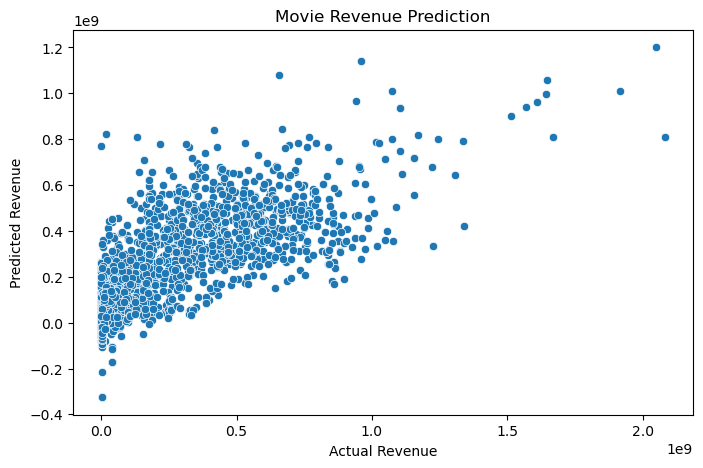

In [44]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Movie Revenue Prediction")
plt.show()

**Sentiment Analysis**

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

In [11]:
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
reviews_df = pd.read_csv("IMDB Dataset.csv")

In [14]:
from tqdm import tqdm
tqdm.pandas()
reviews_df['compound'] = reviews_df['review'].progress_apply(lambda x: analyzer.polarity_scores(x)['compound'])
reviews_df['sentiment'] = reviews_df['compound'].apply(
    lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [06:01<00:00, 138.27it/s]


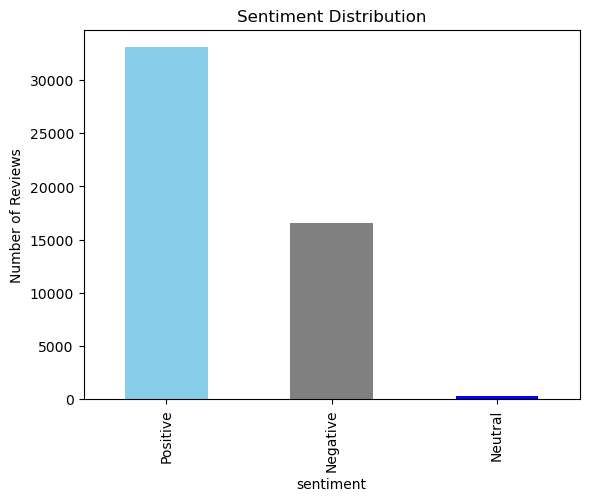

In [15]:
sentiment_counts = reviews_df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['skyblue', 'gray' , 'blue'] , title='Sentiment Distribution')
plt.ylabel('Number of Reviews')
plt.show()

**Success Predection Model**

In [17]:
sentiment_counts = df.groupby(['genre', reviews_df['sentiment']]).size().unstack().fillna(0)
sentiment_counts = sentiment_counts.sort_values(by='Positive', ascending=False).head(10)

In [18]:
import numpy as np

In [23]:
genre_sentiment = reviews_df.groupby([df['genre'], 'sentiment']).size().unstack().fillna(0)

In [26]:
df_long = sentiment_counts.reset_index().melt(id_vars='genre', var_name='sentiment', value_name='Count')

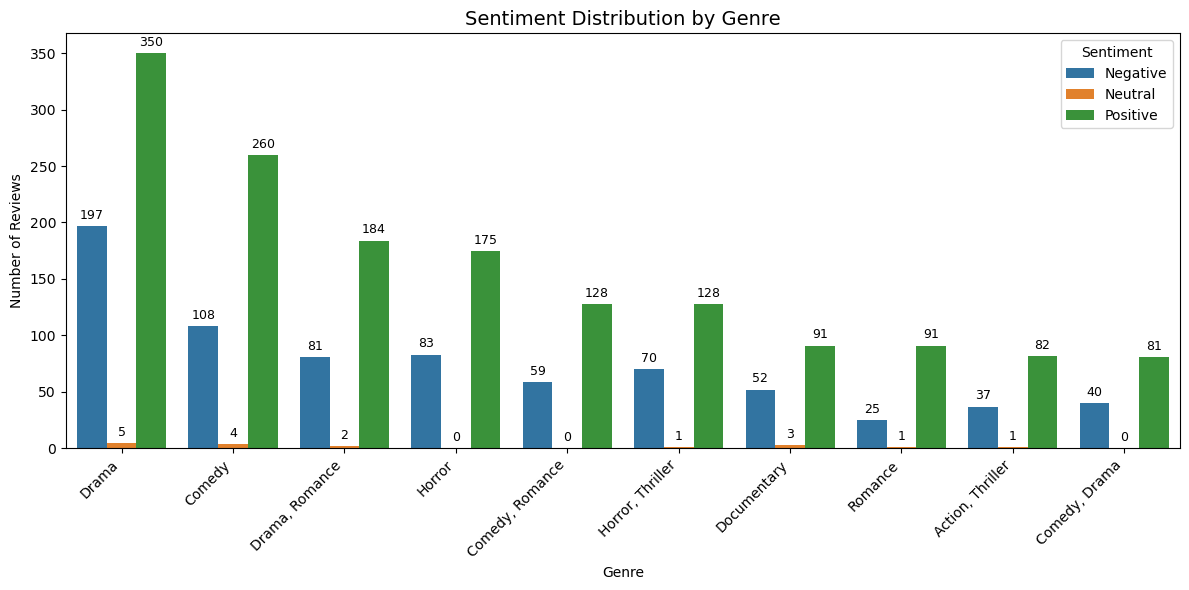

In [37]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_long, x='genre', y='Count', hue='sentiment')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)
plt.title("Sentiment Distribution by Genre", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

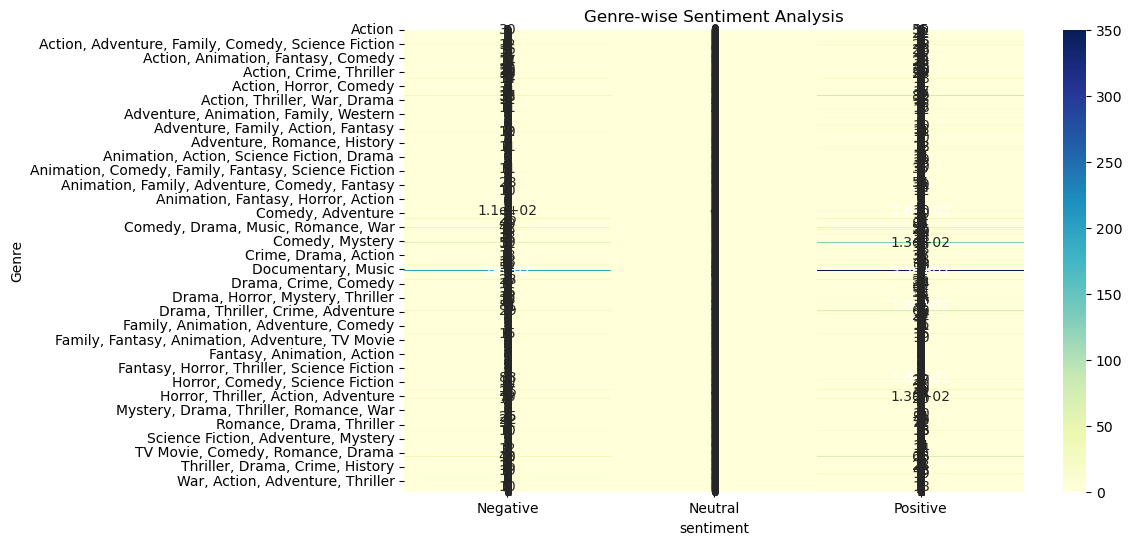

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(genre_sentiment, annot=True, cmap='YlGnBu')
plt.title("Genre-wise Sentiment Analysis")
plt.ylabel("Genre")
plt.show()